## Анализ данных в задаче кредитного скоринга

Поля в предоставляемых данных имеют следующий смысл:

LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)

SEX: пол клиента (1 = мужской, 2 = женский )

EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).

MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).

AGE: возраст в годах

PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)

BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь

PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре

default - индикатор невозврата денежных средств

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [35]:
data = pd.read_csv('credit_card_default_analysis.csv')

In [4]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# размер данных
data.shape

(30000, 25)

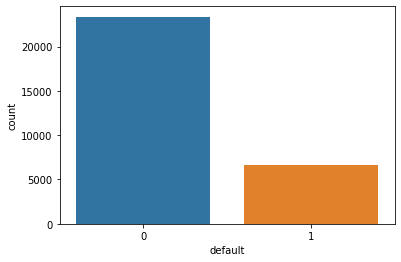

In [6]:
# распределение целевого признака
sns.countplot(x = 'default', data=data);

In [7]:
data['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [8]:
# описание данных
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,0.356767,0.760594,0.0,0.00,0.0,0.00,8.0
PAY_2,30000.0,0.320033,0.801727,0.0,0.00,0.0,0.00,8.0
PAY_3,30000.0,0.304067,0.790589,0.0,0.00,0.0,0.00,8.0
PAY_4,30000.0,0.258767,0.761113,0.0,0.00,0.0,0.00,8.0


In [9]:
# посмотрим на полноту данных, видим, что пропусков нет
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


**1. Размер кредитного лимита (LIMIT_BAL).** В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: 
a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки 
b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

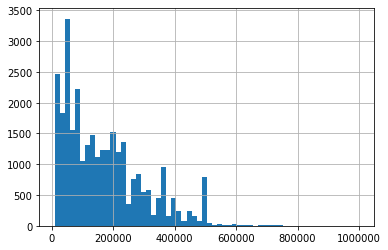

In [10]:
# распределение признака LIMIT_BAL
data['LIMIT_BAL'].hist(bins = 60);

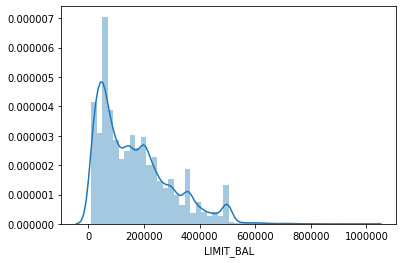

In [11]:
sns.distplot(data["LIMIT_BAL"]);

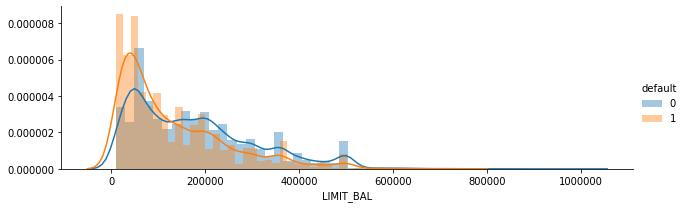

In [12]:
# распределение признака LIMIT_BAL в зависмости от значения целевой переменной
fg = sns.FacetGrid(data, hue="default", aspect=3)
fg.map(sns.distplot, "LIMIT_BAL").add_legend();

Проверям равенство медиан. Н0 - медианы равны против альтернативы Н1 - медианы отличаются

In [13]:
# посмотрим на значения медианных значений в двух группах
lim_1 = data[data['default'] == 1]['LIMIT_BAL'].values
lim_0 = data[data['default'] == 0]['LIMIT_BAL'].values
np.median(lim_1), np.median(lim_0)

(90000.0, 150000.0)

In [14]:
# видим, что медианное значение для группы невернувших кредит, меньше
# проверим гипотезу о равенстве медиан, построим с помощью бутстрепа 95% доверительный интервал
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [15]:
np.random.seed(0)

lim_1_samples = get_bootstrap_samples(lim_1, 1000)
lim_0_samples = get_bootstrap_samples(lim_0, 1000)

lim_1_median_scores = np.median(lim_1_samples, axis = 1)
lim_0_median_scores = np.median(lim_0_samples, axis = 1)

print('95% confidence interval for the 1 group:',  stat_intervals(lim_1_median_scores, 0.05))
print('95% confidence interval for the 0 group:',  stat_intervals(lim_0_median_scores, 0.05))

95% confidence interval for the 1 group: [80000. 90000.]
95% confidence interval for the 0 group: [150000. 150000.]


In [16]:
delta_median_scores = lim_0_median_scores - lim_1_median_scores
print('95% confidence interval for the difference between medians',  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [60000. 70000.]


**Вывод:** доверительный интервал не включает 0, разница между медианами существенная

Проверим гипотезу о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Н0 - средние равны, альтернатива Н1 - средние различаются

In [17]:
# Проверим гипотезу о равенстве распределений с помощью одного из подходящих непараметрических критериев 
# проверки равенства средних
# Воспользуемся критерием Манна-Уитни
from scipy import stats

In [18]:
# посмотрим на средние значения двух выборок
np.mean(lim_1), np.mean(lim_0)

(130109.65641952984, 178099.72607430234)

In [19]:
# кажется, что средние сильно отличаются. Посмотрим, что покажет критерйи Манна-Уитни
stats.mannwhitneyu(lim_1, lim_0)

MannwhitneyuResult(statistic=59257217.5, pvalue=6.127742909111652e-190)

**Вывод**: Достигаемый уровень значимости значительно меньше 0.05, гипотеза Н0 о равенстве распределений отвергается

Результат является практически значимым, потому что с учетом статистической значимости можно рассчитывать дополнительные параметры при выдаче кредитов на различные суммы и предусмотреть дополнительные проверки

**2. Пол (SEX):** Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

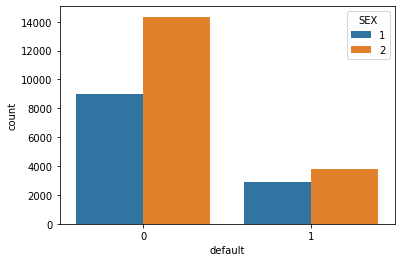

In [21]:
# распределение полов в двух группах, кажется, что женщины более благонадежные плательщики)))
sns.countplot(x='default', data=data, hue='SEX');

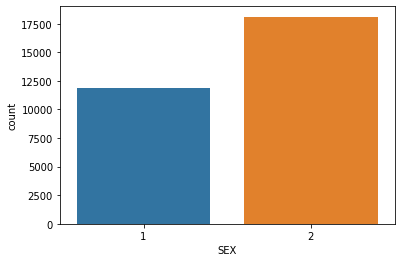

In [26]:
# женщин в принципе больше в выборке
sns.countplot(x = 'SEX', data=data);

In [36]:
# для упрощеия работы сделаем признако SEX бинарным
data['SEX'] = data['SEX'].map({2:0, 1:1})

In [38]:
data['SEX'].value_counts()

0    18112
1    11888
Name: SEX, dtype: int64

In [39]:
# подготовим данные - две группы 
sex_1 = data[data['default'] == 1]['SEX']
sex_0 = data[data['default'] == 0]['SEX']
#посмотрим на соотношение полов в каждой группе
print(sex_1.value_counts(normalize = True),'\n',sex_0.value_counts(normalize = True))

0    0.567058
1    0.432942
Name: SEX, dtype: float64 
 0    0.61415
1    0.38585
Name: SEX, dtype: float64


Проверим гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Н0 - гендерый состав групп не отличается, альтернатива Н1 - отличается

In [40]:
# Проверим гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается
# Построим доверительные интервалы для доли мужчин в двух группах
from statsmodels.stats.proportion import proportion_confint

In [47]:
conf_interval_1 = proportion_confint(sum(sex_1), 
                                     sex_1.shape[0],
                                     method = 'wilson')
conf_interval_0 = proportion_confint(sum(sex_0), 
                                     sex_0.shape[0],
                                     method = 'wilson')
print('interval for group 1 [%f, %f]' %conf_interval_1)
print('interval for group 0 [%f, %f]' %conf_interval_0)

interval for group 1 [0.421062, 0.444898]
interval for group 0 [0.379627, 0.392110]


In [49]:
# видно, что интервалы не пересаекаются
# но все равно построим доверительный интервал для разности долей
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)   
    p1 = sum(sample1) / sample1.shape[0]
    p2 = sum(sample2) / sample2.shape[0]
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ sample1.shape[0] + p2 * (1 - p2)/ sample2.shape[0])
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ sample1.shape[0] + p2 * (1 - p2)/ sample2.shape[0])
    
    return (left_boundary, right_boundary)

In [50]:
print("95%% confidence interval for a difference between proportions: [%f, %f]" %\
      proportions_confint_diff_ind(sex_1, sex_0))

95% confidence interval for a difference between proportions: [0.033635, 0.060548]


Доверительный интервал не включает 0, гендерный состав отличатся статистически значимо

In [52]:
# посчитаем достигаемый уровень значимости
# H0 - гендерный состав двух групп одинаковый

#функция для подсчета статистики
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = sample1.shape[0]
    n2 = sample2.shape[0]
    p1 = sum(sample1) / n1
    p2 = sum(sample2) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

# функция для подстчета p-value
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [55]:
print("p-value:", proportions_diff_z_test(proportions_diff_z_stat_ind(sex_1, sex_0)))

p-value: 4.472866521609831e-12


In [57]:
print("p-value:", proportions_diff_z_test(proportions_diff_z_stat_ind(sex_1, sex_0), 'greater'))

p-value: 2.2364332608049153e-12


**Вывод**
видим, что p-value значительно ниже 0.05, H0 уверенно отвергается, гендерный состав в двух группах отличается, доля мужчин, не возвращающих кредит, значительно больше доли мужчин, возвращающих его


**3. Образование (EDUCATION):** Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

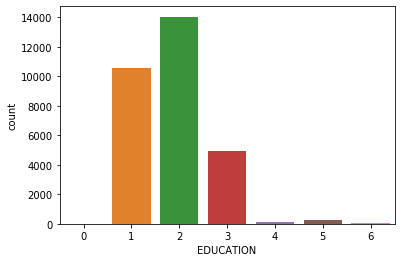

In [26]:
sns.countplot('EDUCATION', data=data)

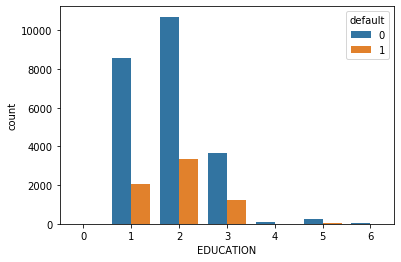

In [27]:
sns.countplot(x='EDUCATION', data=data, hue='default');

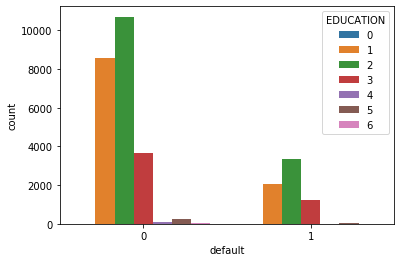

In [28]:
sns.countplot(x='default', data=data, hue='EDUCATION');

In [58]:
education = pd.crosstab(data['EDUCATION'], data['default']).T
education

EDUCATION,0,1,2,3,4,5,6
default,,,,,,,
0,14,8549,10700,3680,116,262,43
1,0,2036,3330,1237,7,18,8


In [87]:
# посомтрим на долю тех, кто не возвращает кредит, в общем количестве людей с данным образованием
education.iloc[1].values / (education.iloc[0].values + education.iloc[1].values)

array([0.        , 0.19234766, 0.23734854, 0.25157616, 0.05691057,
       0.06428571, 0.15686275])

Видно, что доля невозврата кредита наименьшая с образованием 0, наибольшая с образованием 3. Проверим это.

Воспользуемся критерием хи-квадрат

Проверка условия применимости критерия

Критерий хи-квадрат для таблиц сопряженности может применяться при выполнении следующих условий:
1. Нужно, чтобы выборки были достаточно большими: n > 40. - выполняется
2. Необходимо, чтобы ожидаемое количество элементов в каждой ячейке таблицы было меньше 5 не более, чем в 20% ячеек - выполняется (в нашем примере только одна ячейка из 14, т.е. 7 %

In [63]:
res = stats.chi2_contingency(education)
res

(163.21655786997073,
 1.2332626245415605e-32,
 6,
 array([[1.0903200e+01, 8.2435980e+03, 1.0926564e+04, 3.8293596e+03,
         9.5792400e+01, 2.1806400e+02, 3.9718800e+01],
        [3.0968000e+00, 2.3414020e+03, 3.1034360e+03, 1.0876404e+03,
         2.7207600e+01, 6.1936000e+01, 1.1281200e+01]]))

Для категориальных признаков критерий хи-квадрат проверяет гипотезу о равенстве нулю коэффициента V Крамера против альтернативы, что он нулю не равен. 
Достигамый уровень значисмости в нашем примере гораздо меньше 0.05, соответсвенно нулевая гипотеза уверенно отвергается в пользу альтернативы. Т.е. коэффициент V Крамера нулю не равен, следовательно **взаимосвязь имеется!**

In [74]:
# посчитаем значение коэффициента V Крамера
koef =  np.sqrt(res[0] / data.shape[0])
koef

0.07376009713252163

Коэффициент очень маленький (меньше 0.1). то есть **связь имеется, но незначительная.**

Ожидаемое количество человек:

In [65]:
pd.DataFrame(res[3])

,0,1,2,3,4,5,6
0,10.9032,8243.598,10926.564,3829.3596,95.7924,218.064,39.7188
1,3.0968,2341.402,3103.436,1087.6404,27.2076,61.936,11.2812


Таблица сопряженности "образование" на "возврат долга", где значением ячейки является разность между наблюдаемым и ожидаемым количеством человек:

In [77]:
education - pd.DataFrame(res[3])

EDUCATION,0,1,2,3,4,5,6
default,,,,,,,
0,3.0968,305.402,-226.564,-149.3596,20.2076,43.936,3.2812
1,-3.0968,-305.402,226.564,149.3596,-20.2076,-43.936,-3.2812


In [110]:
# модифицируем таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ?
# разделим на ожидаемое количество людей в каждой группе образования
(education - pd.DataFrame(res[3])) / pd.DataFrame(res[3])

EDUCATION,0,1,2,3,4,5,6
default,,,,,,,
0,0.284027,0.037047,-0.020735,-0.039004,0.210952,0.201482,0.082611
1,-1.000000,-0.130436,0.073004,0.137324,-0.742719,-0.709377,-0.290856


Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

Отдаст долг, если образование 0 - доктор, не отдаст, если 3 -  выпускник школы

**4. Семейное положение (MARRIAGE):** Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

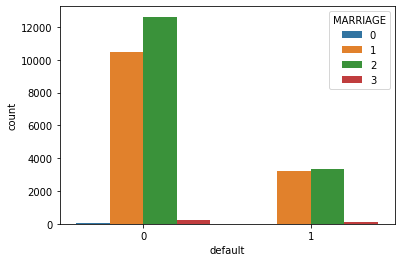

In [29]:
sns.countplot(x='default', data=data, hue='MARRIAGE');

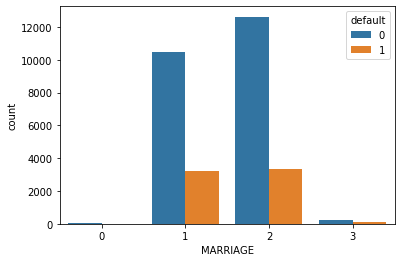

In [30]:
sns.countplot(x='MARRIAGE', data=data, hue='default');

In [90]:
# составим таблицу сопряженности
marriage = pd.crosstab(data['MARRIAGE'], data['default']).T
marriage

MARRIAGE,0,1,2,3
default,,,,
0,49,10453,12623,239
1,5,3206,3341,84


Можно применить критерий хи-квадарат

Проверка условия применимости критерия

Критерий хи-квадрат для таблиц сопряженности может применяться при выполнении следующих условий:
1. Нужно, чтобы выборки были достаточно большими: n > 40 - выполняется
2. Необходимо, чтобы ожидаемое количество элементов в каждой ячейке таблицы было меньше 5 не более, чем в 20% ячеек - выполняется (в нашем примере везде не меньше 5)

In [92]:
res1 = stats.chi2_contingency(marriage)
res1

(35.66239583433609,
 8.825862457577375e-08,
 3,
 array([[4.20552000e+01, 1.06376292e+04, 1.24327632e+04, 2.51552400e+02],
        [1.19448000e+01, 3.02137080e+03, 3.53123680e+03, 7.14476000e+01]]))

In [93]:
# посчитаем значение коэффициента V Крамера
koef1 =  np.sqrt(res1[0] / data.shape[0])
koef1

0.034478203662766466

Коэффициент V Крамера не равен нулю, но очень к нему близок, то есть связь между переменными имеется, но очень незначительная

**5. Возраст (AGE):** Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

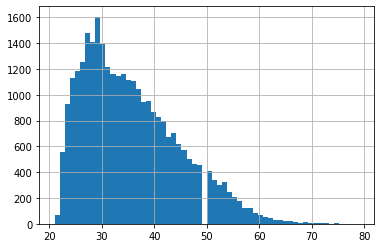

In [31]:
data['AGE'].hist(bins = 60);

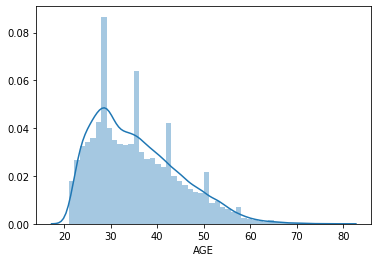

In [36]:
sns.distplot(data["AGE"], norm_hist = False)

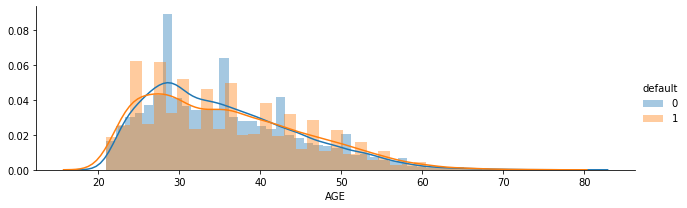

In [33]:
fg = sns.FacetGrid(data, hue="default", aspect=3)
fg.map(sns.distplot, "AGE").add_legend();

Воспользуемся теми же методами, что и в вопросе 1

In [94]:
age_1 = data[data['default'] == 1]['AGE'].values
age_0 = data[data['default'] == 0]['AGE'].values
np.median(age_1), np.median(age_0)

(34.0, 34.0)

Ух ты, медианы совпадают! проверим ка

In [95]:
np.random.seed(0)

age_1_samples = get_bootstrap_samples(age_1, 1000)
age_0_samples = get_bootstrap_samples(age_0, 1000)

age_1_median_scores = np.median(age_1_samples, axis = 1)
age_0_median_scores = np.median(age_0_samples, axis = 1)

print('95% confidence interval for the 1 group:',  stat_intervals(age_1_median_scores, 0.05))
print('95% confidence interval for the 0 group:',  stat_intervals(age_0_median_scores, 0.05))

95% confidence interval for the 1 group: [34. 35.]
95% confidence interval for the 0 group: [34. 34.]


In [96]:
delta_median_scores_age = age_0_median_scores - age_1_median_scores
print('95% confidence interval for the difference between medians',  stat_intervals(delta_median_scores_age, 0.05))

95% confidence interval for the difference between medians [-1.  0.]


Доверительный интервал включает 0! Медианы совпадают!

In [97]:
# посмотрим на срение значения двух выборок
np.mean(age_1), np.mean(age_0)

(35.72573839662447, 35.417265879130284)

In [98]:
# кажется, что средние близки. Посмотрим, что покажет критерий Манна-Уитни
stats.mannwhitneyu(age_1, age_0)

MannwhitneyuResult(statistic=76966879.5, pvalue=0.1862517717449308)

Нулевая гипотеза о равенстве средних не отвергается! В данном случае мы принимаем нулевую гиоптезу о равенстве распределений

С практической точки зрения результаты значимы в том смысле, что значение возраста не влияет на возврат или невозврат кредита

Для интереса посчитаем p-value с помощью перестановочного критерия

In [102]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), list(filter(lambda i: i not in index, range(n)))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [109]:
print("p-value: %f" % permutation_test(age_0, age_1, max_permutations = 5000))

p-value: 0.017200


значение получилось достаточно маленьким, надо разбираться

посмотрим на доверительные интервалы

In [105]:
from statsmodels.stats.weightstats import zconfint

In [106]:
print('95%% confidence interval for the mean: [%f, %f]' % zconfint(age_1))

95% confidence interval for the mean: [35.492515, 35.958962]


In [107]:
print('95%% confidence interval for the mean: [%f, %f]' % zconfint(age_0))

95% confidence interval for the mean: [35.300871, 35.533661]


Доверительные интервалы пересекаются, Н0 отвергать нельзя. Средние одинаковы.